Import some libraries I use in the script

In [ ]:
import requests, zipfile, io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from matplotlib import pyplot
from sklearn.preprocessing import Imputer
from time import mktime


Load data into the dataframe

In [ ]:
# Download the datafile
zip_file_url="https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
df = pd.DataFrame.from_csv('AirQualityUCI.csv', index_col=None,sep=';')

# Preprocessing

This includes: 
* Cleaning the data
* fixing the dataset format
* Taking care of missing values

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# fixing the dataset format
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.').astype(float)
df['T'] = df['T'].str.replace(',','.').astype(float)
df['RH'] = df['RH'].str.replace(',','.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.').astype(float)
df['AH'] = df['AH'].str.replace(',','.').astype(float)
df.info()

In [ ]:
# drop those column with all NaNs
dp=df.dropna(axis=1,how='all')

In [ ]:
# Proving there are NaN values

def number_of_not_a_number_in_column(df, column_name):
    """Given a column name, finds the number of rows with a NaN value
    """
    
    return df[column_name].shape[0] - df[column_name].dropna().shape[0]


def number_of_not_a_number_in_columns(df):
    """Walks all columns in a DataFrame and figures out how many rows each column have a NaN value
    """
    
    column_names = list(df.columns.values)

    for column_name in column_names:
        not_a_number_row_count = number_of_not_a_number_in_column(df, column_name)
        print(f"{column_name} has " + str(not_a_number_row_count) + " rows with a NaN")
        print("Which is " + str(not_a_number_row_count / len(df.index) * 100) + "% percent of all rows\n")

number_of_not_a_number_in_columns(dp)

In [ ]:
dp.shape

-200 values are missing values, lets find them and impute them with mean value of colummn

In [ ]:
dp = dp.replace(-200, np.nan)

In [ ]:
# remove rows with all NaNs
dp=dp.dropna(axis=0,how='all')
#Keep only the rows with at least 13 non-na values
dp=dp.dropna(axis=0,thresh=13)

In [ ]:
dp.isnull().sum()

Lets impute missing values with mean

In [ ]:
y = dp[dp.columns[-13:]]
cl=y.columns
values=y.values
imputer=Imputer(missing_values="NaN", strategy='mean', axis=1)
ImputeValues=imputer.fit_transform(values)
CleanData=pd.DataFrame(ImputeValues)
CleanData.columns = cl
CleanData.loc[:,'Datetime'] = dp['Date'] + ' ' + dp['Time']
CleanData.head()

In [ ]:
# from datetime import datetime
# DateTime = []
# for x in CleanData['Datetime']:
#     DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))

In [ ]:

eee = pd.to_datetime(CleanData.Datetime, format='%d/%m/%Y %H.%M.%S')
datetime = pd.Series(eee)
CleanData.index = datetime


In [ ]:
CleanData.shape

# Visualizing the data (time series)

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
CleanData.plot(subplots=True, layout=(7, 2), figsize=(18, 6), sharex=False)
plt.subplots_adjust(top=0.92, bottom=0.01, left=0.10, right=0.95, hspace=0.6,wspace=0.1)
plt.show()


In [ ]:
fig, axes = plt.subplots(4,1, figsize=(24,8))

axes[0].plot(CleanData.iloc[:,0]['2004-10-04':'2004-10-07'])
axes[0].set_title ('CO(GT)')
axes[1].plot(CleanData.iloc[:,1]['2004-10-04':'2004-10-07'])
axes[1].set_title ('PT08.S1(CO)')
axes[2].plot(CleanData.iloc[:,2]['2004-10-04':'2004-10-07'])
axes[2].set_title ('NMHC(GT)')
axes[3].plot(CleanData.iloc[:,3]['2004-10-04':'2004-10-07'])
axes[3].set_title ('C6H6(GT)')
plt.show()

Lets take a look at lag plot. A lag plot checks whether a data set or time series is random or not. Random data should not exhibit any identifiable structure in the lag plot. Non-random structure in the lag plot indicates that the underlying data are not random.

In [ ]:
from pandas.plotting import lag_plot
lag_plot(CleanData.iloc[:,2])
pyplot.show()

It shows it doesnt have consistent trend over time.

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(CleanData, alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()
# plt.savefig("./images/scatter_matrix.png")

In [81]:
FData=CleanData
FData.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
Datetime,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10/03/2004 18.00.00
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10/03/2004 19.00.00
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10/03/2004 20.00.00
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10/03/2004 21.00.00
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10/03/2004 22.00.00


# Correction Matrix Plot between features


In [206]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1,-0.095,0.056,-0.05,-0.062,-0.13,0.067,-0.1,0.039,-0.069,0.12,-0.037,0.11
PT08.S1(CO),-0.095,1,0.59,0.88,0.89,0.71,-0.76,0.54,0.67,0.9,0.04,0.15,0.15
NMHC(GT),0.056,0.59,1,0.71,0.71,0.6,-0.69,0.36,0.49,0.68,0.2,0.013,0.26
C6H6(GT),-0.05,0.88,0.71,1,0.98,0.71,-0.73,0.51,0.76,0.86,0.2,-0.044,0.19
PT08.S2(NMHC),-0.062,0.89,0.71,0.98,1,0.69,-0.79,0.53,0.77,0.88,0.25,-0.072,0.21
NOx(GT),-0.13,0.71,0.6,0.71,0.69,1,-0.64,0.7,0.23,0.78,-0.27,0.22,-0.15
PT08.S3(NOx),0.067,-0.76,-0.69,-0.73,-0.79,-0.64,1,-0.51,-0.52,-0.79,-0.13,-0.081,-0.23
NO2(GT),-0.1,0.54,0.36,0.51,0.53,0.7,-0.51,1,0.13,0.6,-0.18,-0.063,-0.31
PT08.S4(NO2),0.039,0.67,0.49,0.76,0.77,0.23,-0.52,0.13,1,0.58,0.58,-0.028,0.65
PT08.S5(O3),-0.069,0.9,0.68,0.86,0.88,0.78,-0.79,0.6,0.58,1,-0.03,0.15,0.079


# Normalizing the dataset

In [84]:
# integer encode direction
from sklearn.preprocessing import LabelEncoder
Fvalues=FData.values
encoder = LabelEncoder()
Fvalues[:,12] = encoder.fit_transform(Fvalues[:,12])

In [101]:
from sklearn.preprocessing import MinMaxScaler

Fvalues2 = FData[FData.columns.difference(['Datetime'])] # choose all columns except Datetime
# ensure all data is float
Fvalues2 = Fvalues2.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(Fvalues2)

# Basic Machine learning algorithms
Lets do some basic machine learning experiment on the data. Very first thing is to split data into testing and training set. we like to make prediction of the temperature based on other features. (Imagine we have done feature selection and we found out the first 4 features affect the temperature)

In [102]:
from sklearn import cross_validation

X = scaled[:,0:11] # all features we use to make a prediction on target value
Y = scaled[:,11] # target Value (temperature)
validation_size = 0.3
seed = 1
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape)

(5202, 11) (2230, 11) (5202,) (2230,)


In [109]:
# fit a model
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_validation)
predictions

array([ 0.44358609,  0.67105375,  0.40948524, ...,  0.25180654,
        0.71768466,  0.68156302])

In [171]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
scores.mean()


-0.02495892277621907

In [130]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rmse_scores)

Scores: [ 0.15691671  0.15802595  0.16383316  0.15574109  0.15948021  0.16299282
  0.14820088  0.1620471   0.15486188  0.15713694]
Mean: 0.157923674505
Standard deviation: 0.00436300434645


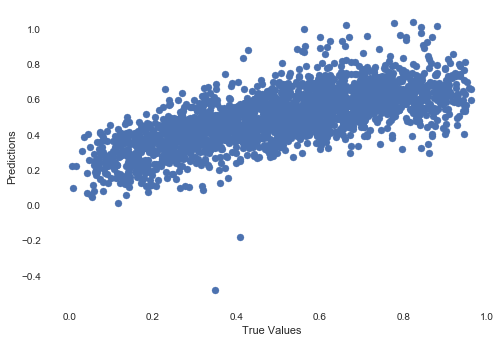

In [188]:
# The line / model
plt.scatter(Y_validation, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()